# KITTI Dataset Exploration

https://github.com/navoshta/KITTI-Dataset/blob/master/kitti-dataset.ipynb

## 1. KITTI Data 다운로드 

![](https://i.imgur.com/SSP9eG4.png)

[Raw Data](http://www.cvlibs.net/datasets/kitti/raw_data.php)
- Length: 114 frames (00:11 minutes)
- Image resolution: 1392 x 512 pixels
- Labels: 12 Cars, 0 Vans, 0 Trucks, 0 Pedestrians, 0 Sitters, 2 Cyclists, 1 Trams, 0 Misc

[주의]
- This package assumes that you have also downloaded the calibration data associated with the sequences you want to work on (these are separate files from the sequences themselves), and that the directory structure is unchanged from the original structure laid out in the KITTI zip files.

In [18]:
!wget http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip
!wget http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_calib.zip
!unzip 2011_09_26_drive_0001_sync.zip
!unzip 2011_09_26_calib.zip

--2017-09-26 11:23:33--  http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip
Resolving kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)... 192.124.27.130
Connecting to kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)|192.124.27.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 458643963 (437M) [application/zip]
Saving to: ‘2011_09_26_drive_0001_sync.zip.1’

2011_09_26_drive_00 100%[===================>] 437.40M  8.71MB/s    in 52s     

2017-09-26 11:24:26 (8.48 MB/s) - ‘2011_09_26_drive_0001_sync.zip.1’ saved [458643963/458643963]

--2017-09-26 11:24:26--  http://kitti.is.tue.mpg.de/kitti/raw_data/2011_09_26_calib.zip
Resolving kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)... 192.124.27.130
Connecting to kitti.is.tue.mpg.de (kitti.is.tue.mpg.de)|192.124.27.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4068 (4.0K) [application/zip]
Saving to: ‘2011_09_26_calib.zip.1’

2011_09_26_calib.zi 100%[===========

## 2. pykitti 설치 및 Import  

In [30]:
# https://github.com/utiasSTARS/pykitti
!pip install pykitti
import pykitti

## From Source 
# git clone https://github.com/utiasSTARS/pykitti.git
# cd pykitti
# python setup.py install

In [24]:
basedir = os.getcwd()
date = '2011_09_26'
drive = '0001'

## 3. KITTI data Load
- The 'frames' argument is optional - default: None, which loads the whole dataset.
- Calibration and timestamp data are read automatically. 
- Other sensor data (cameras, IMU, Velodyne) are available via properties 
- that create generators when accessed.

In [38]:
dataset = pykitti.raw(basedir, date, drive, frames=range(0, 50, 5), imformat='cv2')
# imformat='cv2': OpenCV-friendly format (i.e., uint8 with BGR color channel ordering) 

In [33]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
print('\nDrive: ' + str(dataset.drive))
print('\nFrame range: ' + str(dataset.frames))


Drive: 2011_09_26_drive_0001_sync

Frame range: range(0, 50, 5)


In [39]:
print('\nIMU-to-Velodyne transformation:\n' + str(dataset.calib.T_velo_imu))
print('\nGray stereo pair baseline [m]: ' + str(dataset.calib.b_gray))
print('\nRGB stereo pair baseline [m]: ' + str(dataset.calib.b_rgb))


IMU-to-Velodyne transformation:
[[ 1.      0.0008 -0.002  -0.8087]
 [-0.0008  0.9999 -0.0148  0.3196]
 [ 0.002   0.0148  0.9999 -0.7997]
 [ 0.      0.      0.      1.    ]]

Gray stereo pair baseline [m]: 0.537150600501

RGB stereo pair baseline [m]: 0.532725440079


## 4. Data확인
- dataset.calib:      Calibration data are accessible as a named tuple
- dataset.timestamps: Timestamps are parsed into a list of datetime objects
- dataset.oxts:       Returns a generator that loads OXTS packets as named tuples
- dataset.camN:       Returns a generator that loads individual images from camera N
- dataset.gray:       Returns a generator that loads monochrome stereo pairs (cam0, cam1)
- dataset.rgb:        Returns a generator that loads RGB stereo pairs (cam2, cam3)
- dataset.velo:       Returns a generator that loads velodyne scans as [x,y,z,reflectance]

In [42]:
import itertools

# Grab some data
second_pose = next(iter(itertools.islice(dataset.oxts, 1, None))).T_w_imu
first_gray = next(iter(dataset.gray))
first_cam1 = next(iter(dataset.cam1))
first_rgb = next(iter(dataset.rgb))
first_cam2 = next(iter(dataset.cam2))
third_velo = next(iter(itertools.islice(dataset.velo, 2, None)))

In [43]:
print('\nFirst timestamp: ' + str(dataset.timestamps[0]))
print('\nSecond IMU pose:\n' + str(second_pose))


First timestamp: 2011-09-26 13:02:25.964389

Second IMU pose:
[[-0.8678  0.4963 -0.0243 -5.8173]
 [-0.4968 -0.8675  0.0254 -3.4647]
 [-0.0084  0.0341  0.9994  0.0236]
 [ 0.      0.      0.      1.    ]]


### 4.1 `dataset.camN` 데이터 확인

In [57]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0, 0].imshow(first_gray[0], cmap='gray')
ax[0, 0].set_title('Left Gray Image (cam0)')

ax[0, 1].imshow(first_cam1, cmap='gray')
ax[0, 1].set_title('Right Gray Image (cam1)')

ax[1, 0].imshow(first_cam2)
ax[1, 0].set_title('Left RGB Image (cam2)')

ax[1, 1].imshow(first_rgb[1])
ax[1, 1].set_title('Right RGB Image (cam3)')

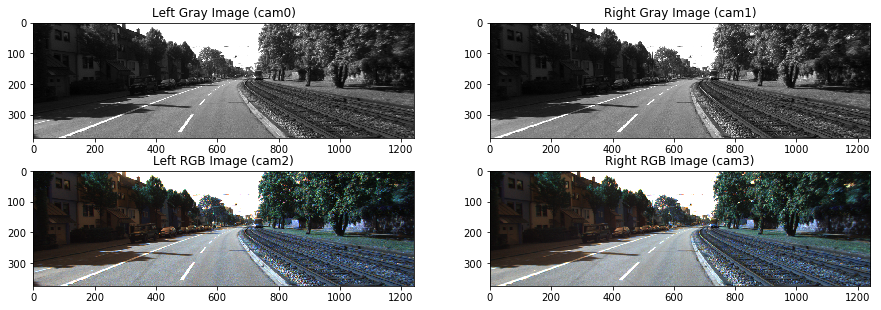

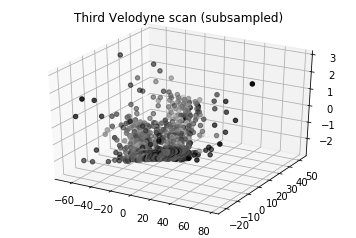

In [58]:
from mpl_toolkits.mplot3d import Axes3D

f2 = plt.figure()
ax2 = f2.add_subplot(111, projection='3d')
# Plot every 100th point so things don't get too bogged down
velo_range = range(0, third_velo.shape[0], 100)
ax2.scatter(third_velo[velo_range, 0],
            third_velo[velo_range, 1],
            third_velo[velo_range, 2],
            c=third_velo[velo_range, 3],
            cmap='gray')
ax2.set_title('Third Velodyne scan (subsampled)')

plt.show()